### Importing datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Stats libraries
from scipy.stats import skew
import scipy.stats as stats

#for n-way ANOVA
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import statsmodels.sandbox.stats.multicomp as ml #tukeyhsd

#Controlling figure aesthetics
sns.set_style("darkgrid") 
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

import warnings
warnings.filterwarnings('ignore')

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Problem 1A:

<font size=4><span style="color:darkred">
Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination. [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]</span></font>

In [2]:
# importing dataset

SalaryData = pd.read_csv('SalaryData.csv')
SalaryData.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [3]:
#Checking the structure of the SalaryData

print(color.BOLD+color.RED+'Total dimension for SalaryData:'+color.END,SalaryData.shape)
print(color.BOLD+color.BLUE+'Total rows in SalaryData:'+color.END,SalaryData.shape[0])
print(color.BOLD+color.BLUE+'Total columns in SalaryData:'+color.END,SalaryData.shape[1])

Total dimension for SalaryData: (40, 3)
Total rows in SalaryData: 40
Total columns in SalaryData: 3


In [4]:
#Checking the info of the data

SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [5]:
#Checking to see if there are any null values

SalaryData.isnull().values.any()

False

In [6]:
# Checking for any duplicate values

dups = SalaryData.duplicated()
print(color.BOLD+color.RED+'Number of duplicate rows = %d' % (dups.sum())+color.END)
SalaryData[dups]

Number of duplicate rows = 0


,Education,Occupation,Salary


In [7]:
#Dividing the columns into numerical and categorical

numerical = SalaryData.describe().columns.to_list()
categorical = SalaryData.select_dtypes('object').columns.to_list()


print(color.BOLD+color.RED+'Numerical Columns: \n\n'+color.END,numerical)
print()
print(color.BOLD+color.PURPLE+'Total number of numerical columns: '+color.END,len(numerical))
print()
print(color.BOLD+color.RED+'Categorical Columns: \n\n'+color.END,categorical)
print()
print(color.BOLD+color.PURPLE+'Total number of categorical columns: '+color.END,len(categorical))

Numerical Columns: 

 ['Salary']

Total number of numerical columns:  1

Categorical Columns: 

 ['Education', 'Occupation']

Total number of categorical columns:  2


In [8]:
descr_stats = SalaryData[numerical].describe().T
descr_stats['Variance'] = SalaryData[numerical].var()
descr_stats['IQR'] = descr_stats['75%']-descr_stats['25%']
descr_stats['Range'] = descr_stats['max']-descr_stats['min']
descr_stats.rename(columns={'count':'Count',
                            'mean':'Mean',
                            'std':'Standard Deviation',
                            '25%':'Q1 (25%)',
                            '50%':'Q2 (50%)',
                            '75%':'Q3 (75%)'},inplace=True)
descr_stats

,Count,Mean,Standard Deviation,min,Q1 (25%),Q2 (50%),Q3 (75%),max,Variance,IQR,Range
Salary,40.0000,"162,186.8750","64,860.4075","50,103.0000","99,897.5000","169,100.0000","214,440.7500","260,151.0000","4,206,872,461.8045","114,543.2500","210,048.0000"


In [9]:
SalaryData.describe(exclude=[np.number]).T

,count,unique,top,freq
Education,40,3,Doctorate,16
Occupation,40,4,Prof-specialty,13


In [10]:
for i in SalaryData.describe().columns:
    a = skew(SalaryData[i])
    if a > 0:
        print('\n',i,':\n\nSkewnes of the data = {}\n\tThe population is not normally distributed.'.format(a))
    elif a < 0:
        print('\n',i,':\n\nSkewnes of the data = {}\n\tThe population is not normally distributed.'.format(a))
    else:
        print('\n',i,':\n\nSkewnes of the data = {}\n\tThe population is normally distributed'.format(a))



 Salary :

Skewnes of the data = -0.16655717024327263
	The population is not normally distributed.


## 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually. (4)

### Formulate the hypothesis of the One-way ANOVA of 'Education' variable with the 'Salary' variable.

$H_0$ : There is no effect of education on Salary.


$H_1$ : At least one of the Education level, mean Salary is different from others.

---

$H_0$ : $\mu$S = $\mu$E = $\mu$O = $\mu$P


$H_1$ : Atleast one of the mean is different from others


### Formulate the hypothesis of the One-way ANOVA of 'Occupation' variable with the 'Salary' variable.

$H_0$ : There is no effect of Occupation on Salary.


$H_1$ : At least one of the Occupation level, mean Salary is different from others.

---

$H_0$ : $\mu$S = $\mu$O = $\mu$E


$H_1$ : Atleast one of the mean is different from others

## 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.(4)

In [11]:
formula = 'Salary~C(Education)'
model = ols(formula,SalaryData).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0000,"102,695,466,735.8860","51,347,733,367.9430",30.9563,0.0000
Residual,37.0000,"61,372,559,274.4889","1,658,717,818.2294",nan,nan


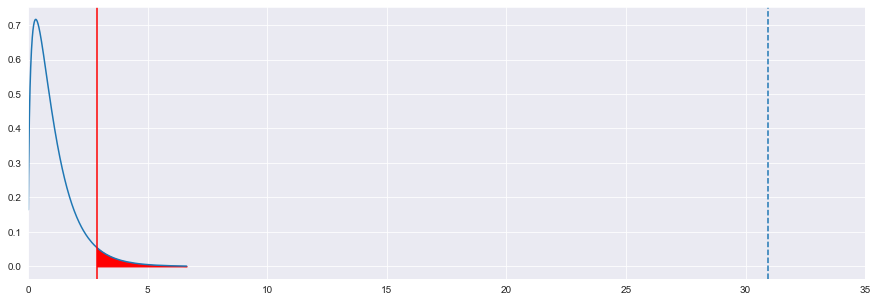

In [12]:
# Visualising the above results
np.random.seed(1234)
x = np.random.f(dfnum = 3,dfden = 36,size=1000)
x = np.sort(x)
y = stats.f.pdf(x,3,36)
fig,axes = plt.subplots(figsize=(15,5))
axes.set_xlim([0,35])
axes.plot(x,y)
axes.axvline(x = 30.9563,linestyle = '--')
axes.axvline(x = stats.f.ppf(0.95,3,36),linestyle = '-',color = 'red')
axes.fill_between(x,y,where = x>stats.f.ppf(0.95,3,36),color = 'red');

__Conclusion :__ We can see that the p value is less than 5% (which was our $\alpha$) hence we reject the null hypothesis. This goes to indicate that the salary is dependent on atleast one of education level. Mean Salary for atleast one of the education level is different.

## 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.(4)


In [13]:
formula = 'Salary~C(Occupation)'
model = ols(formula,SalaryData).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0000,"11,258,782,926.4660","3,752,927,642.1553",0.8841,0.4585
Residual,36.0000,"152,809,243,083.9090","4,244,701,196.7752",nan,nan


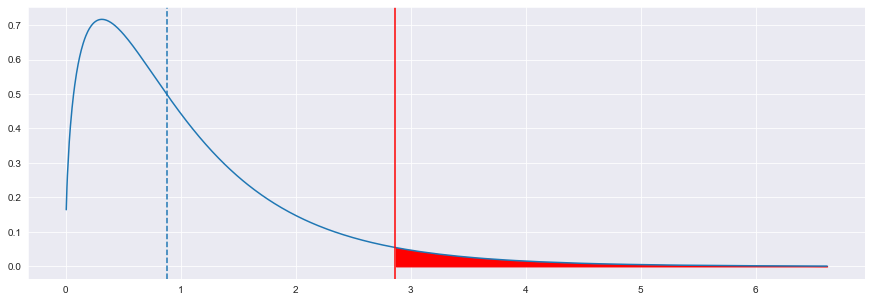

In [14]:
# Visualising the above results
np.random.seed(1234)
x = np.random.f(dfnum = 3,dfden = 36,size=1000)
x = np.sort(x)
y = stats.f.pdf(x,3,36)
fig,axes = plt.subplots(figsize=(15,5))
# axes.set_xlim([0,35])
axes.plot(x,y)
axes.axvline(x = 0.8841,linestyle = '--')
axes.axvline(x = stats.f.ppf(0.95,3,36),linestyle = '-',color = 'red')
axes.fill_between(x,y,where = x>stats.f.ppf(0.95,3,36),color = 'red');

__Conclusion :__ We can see that the p value is more than 5% (which was our $\alpha$) hence we do not have sufficient evidence to reject the null hypothesis. This goes to indicate that the salary is dependent on occupation.

## 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.(0)

In [15]:
# Finding Which class mean is different
print(ml.MultiComparison(SalaryData['Salary'],SalaryData['Education']).tukeyhsd(0.05))

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


__Interpretation__

We can see that the p value is less than 5% (which was our $\alpha$) hence we reject the null hypothesis. This also indicates that mean of the each education category is equal.

In [16]:
# Finding Which class mean is different
print(ml.MultiComparison(SalaryData['Salary'],SalaryData['Occupation']).tukeyhsd(0.05))

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


__Interpretation__

We can see that the p value is more than 5% (which was our $\alpha$) hence we do not have sufficient evidence to reject the null hypothesis. This also indicates that mean of the each ocupation category is not equal.

# Problem 1B:

## 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.(4)


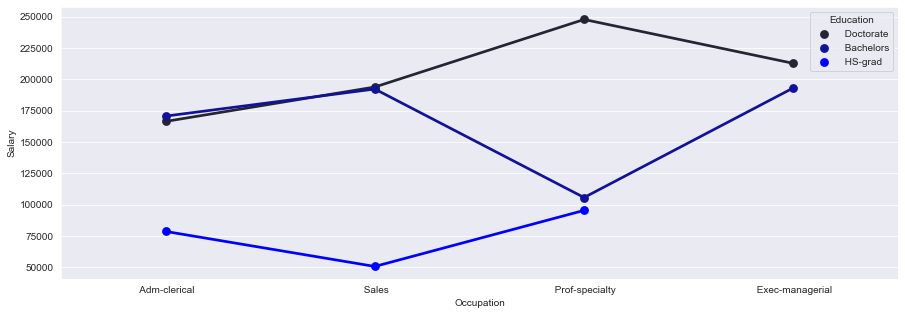

In [17]:
plt.figure(figsize=(15,5))
sns.pointplot(x = 'Occupation',y = 'Salary',data = SalaryData,hue = 'Education',ci = 0,color='blue');

__Analyse__

From the interaction plot we can see very significant evidence of interaction between Doctorate and Bachelors in Adm-clerical and Sales Occupation. Also, there is weak evidence of interaction between Bachelors and HS-grad in Prof-speciality occupation.

## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?(4)


$H_0$ : The mean Salary for each combination of Education and Occupation category is equal. There is no interaction between Occupation and Education category.


$H_1$ : The mean Salary for atleast one combination of Education and Occupation is different from the others.<font color = 'red'>__OR__</font> there is interaction

In [18]:
# Checking for the interaction effect using the 2 way ANOVA
formula = 'Salary~C(Occupation)+C(Education)+C(Education):C(Occupation)'
model = ols(formula,data=SalaryData).fit()
aov_table = anova_lm(model)
aov_table


,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0000,"11,258,782,926.4660","3,752,927,642.1553",5.2779,0.0050
C(Education),2.0000,"96,956,629,862.7808","48,478,314,931.3904",68.1766,0.0000
C(Education):C(Occupation),6.0000,"35,639,495,779.3358","5,939,915,963.2226",8.3535,0.0000
Residual,29.0000,"20,621,020,503.0333","711,069,672.5184",nan,nan


__Interpretation__

We can see that the p value is less than 5% (which was our $\alpha$) hence we reject the null hypothesis. This also indicates that the mean Salary for atleast one combination of Education and Occupation is different from the others.<font color = 'red'>__OR__</font> there is interaction

## 1.7 Explain the business implications of performing ANOVA for this particular case study.(2)


The main hypotheses is that the Salary variable is depended upon the Education of the employee and Occupation of the employee. 

It is observed that the Salary is significantly impacted by Occupation and Education along with their interaction effect. Also, each of the occupational category is significantly different from each other whereas the education category is equal.

# Problem 2:

<font size=4><span style="color:darkred">
The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.</span></font>

In [19]:
# importing dataset

education = pd.read_csv('Education+-+Post+12th+Standard.csv')
education.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1000,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2000,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9000,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7000,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9000,2,10922,15


In [20]:
#Checking the structure of the education dataset

print(color.BOLD+color.RED+'Total dimension for education dataset:'+color.END,education.shape)
print(color.BOLD+color.BLUE+'Total rows in education dataset:'+color.END,education.shape[0])
print(color.BOLD+color.BLUE+'Total columns in education dataset:'+color.END,education.shape[1])

Total dimension for education dataset: (777, 18)
Total rows in education dataset: 777
Total columns in education dataset: 18


In [21]:
#Checking the info of the data

education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [22]:
#Checking to see if there are any null values

education.isnull().values.any()

False

In [23]:
# Checking for any duplicate values

dups = education.duplicated()
print(color.BOLD+color.RED+'Number of duplicate rows = %d' % (dups.sum())+color.END)
education[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [24]:
#Dividing the columns into numerical and categorical

numerical = education.describe().columns.to_list()
categorical = education.select_dtypes('object').columns.to_list()


print(color.BOLD+color.RED+'Numerical Columns: \n\n'+color.END,numerical)
print()
print(color.BOLD+color.PURPLE+'Total number of numerical columns: '+color.END,len(numerical))
print()
print(color.BOLD+color.RED+'Categorical Columns: \n\n'+color.END,categorical)
print()
print(color.BOLD+color.PURPLE+'Total number of categorical columns: '+color.END,len(categorical))

Numerical Columns: 

 ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']

Total number of numerical columns:  17

Categorical Columns: 

 ['Names']

Total number of categorical columns:  1


In [25]:
descr_stats_2 = education[numerical].describe().T
descr_stats_2['Variance'] = education[numerical].var()
descr_stats_2['IQR'] = descr_stats_2['75%']-descr_stats_2['25%']
descr_stats_2['Range'] = descr_stats_2['max']-descr_stats_2['min']
descr_stats_2.rename(columns={'count':'Count',
                            'mean':'Mean',
                            'std':'Standard Deviation',
                            '25%':'Q1 (25%)',
                            '50%':'Q2 (50%)',
                            '75%':'Q3 (75%)'},inplace=True)
descr_stats_2

,Count,Mean,Standard Deviation,min,Q1 (25%),Q2 (50%),Q3 (75%),max,Variance,IQR,Range
Apps,777.0000,"3,001.6384","3,870.2015",81.0000,776.0000,"1,558.0000","3,624.0000","48,094.0000","14,978,459.5301","2,848.0000","48,013.0000"
Accept,777.0000,"2,018.8044","2,451.1140",72.0000,604.0000,"1,110.0000","2,424.0000","26,330.0000","6,007,959.6988","1,820.0000","26,258.0000"
Enroll,777.0000,779.9730,929.1762,35.0000,242.0000,434.0000,902.0000,"6,392.0000","863,368.3923",660.0000,"6,357.0000"
Top10perc,777.0000,27.5586,17.6404,1.0000,15.0000,23.0000,35.0000,96.0000,311.1825,20.0000,95.0000
Top25perc,777.0000,55.7967,19.8048,9.0000,41.0000,54.0000,69.0000,100.0000,392.2292,28.0000,91.0000
F.Undergrad,777.0000,"3,699.9073","4,850.4205",139.0000,992.0000,"1,707.0000","4,005.0000","31,643.0000","23,526,579.3265","3,013.0000","31,504.0000"
P.Undergrad,777.0000,855.2986,"1,522.4319",1.0000,95.0000,353.0000,967.0000,"21,836.0000","2,317,798.8515",872.0000,"21,835.0000"
Outstate,777.0000,"10,440.6692","4,023.0165","2,340.0000","7,320.0000","9,990.0000","12,925.0000","21,700.0000","16,184,661.6314","5,605.0000","19,360.0000"
Room.Board,777.0000,"4,357.5264","1,096.6964","1,780.0000","3,597.0000","4,200.0000","5,050.0000","8,124.0000","1,202,743.0280","1,453.0000","6,344.0000"
Books,777.0000,549.3810,165.1054,96.0000,470.0000,500.0000,600.0000,"2,340.0000","27,259.7799",130.0000,"2,244.0000"


In [26]:
education.describe(exclude=[np.number]).T

,count,unique,top,freq
Names,777,777,Taylor University,1


In [27]:
education_copy = education.copy()

## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?(4)


## Univariate Analysis

### Categorical Columns

In [28]:
for i in categorical:
    print('Univariate Analysis for column:',i)
    print('-----------------'*3)
    print()
    print(education[i].describe())
    print('-----------------'*3)
    print()


Univariate Analysis for column: Names
---------------------------------------------------

count                   777
unique                  777
top       Taylor University
freq                      1
Name: Names, dtype: object
---------------------------------------------------



Since the categorical column has 777 unique values which is equal to total no of rows and each variable with 1 frequency the univariate analysis won't make much sense.

## Univariate Analysis

### Numerical Columns

Univariate Analysis for column: Apps
---------------------------------------------------

count      777.0000
mean     3,001.6384
std      3,870.2015
min         81.0000
25%        776.0000
50%      1,558.0000
75%      3,624.0000
max     48,094.0000
Name: Apps, dtype: float64
---------------------------------------------------

Apps variable has outliers


Skewnes of the column is = -0.16655717024327263
	Hence, the column is negatively skewed or left skewed and is not normally distributed.



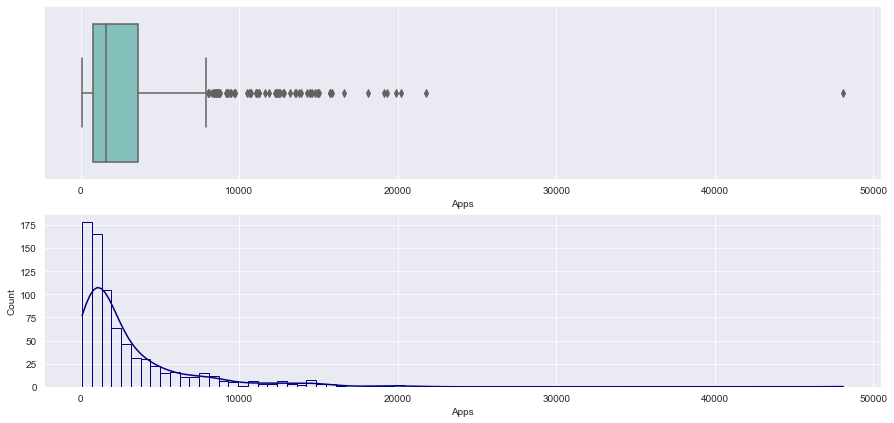

Univariate Analysis for column: Accept
---------------------------------------------------

count      777.0000
mean     2,018.8044
std      2,451.1140
min         72.0000
25%        604.0000
50%      1,110.0000
75%      2,424.0000
max     26,330.0000
Name: Accept, dtype: float64
---------------------------------------------------

Accept variable has outliers


Skewnes of the column is = 3.7165574035202718
	Hence, the column is positively skewed or right skewed and is not normally distributed.



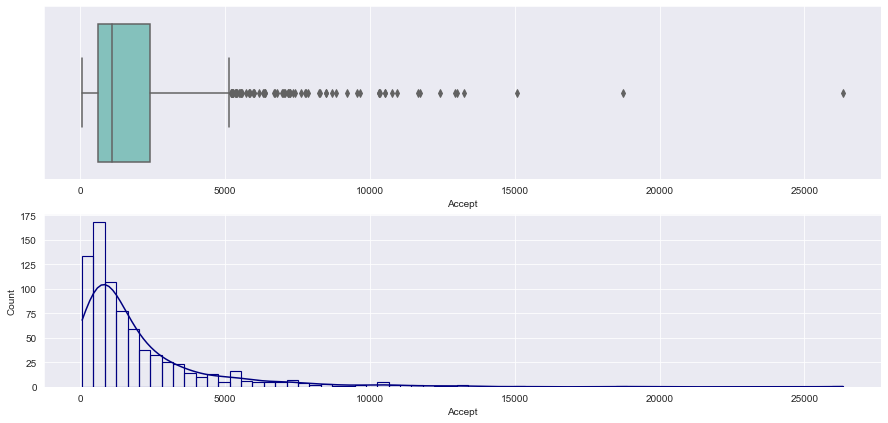

Univariate Analysis for column: Enroll
---------------------------------------------------

count     777.0000
mean      779.9730
std       929.1762
min        35.0000
25%       242.0000
50%       434.0000
75%       902.0000
max     6,392.0000
Name: Enroll, dtype: float64
---------------------------------------------------

Enroll variable has outliers


Skewnes of the column is = 3.4111258724395235
	Hence, the column is positively skewed or right skewed and is not normally distributed.



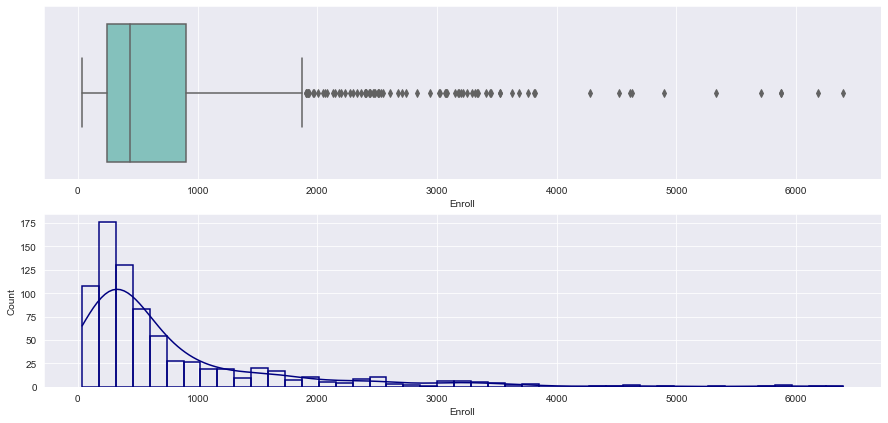

Univariate Analysis for column: Top10perc
---------------------------------------------------

count   777.0000
mean     27.5586
std      17.6404
min       1.0000
25%      15.0000
50%      23.0000
75%      35.0000
max      96.0000
Name: Top10perc, dtype: float64
---------------------------------------------------

Top10perc variable has outliers


Skewnes of the column is = 2.6852679191653412
	Hence, the column is positively skewed or right skewed and is not normally distributed.



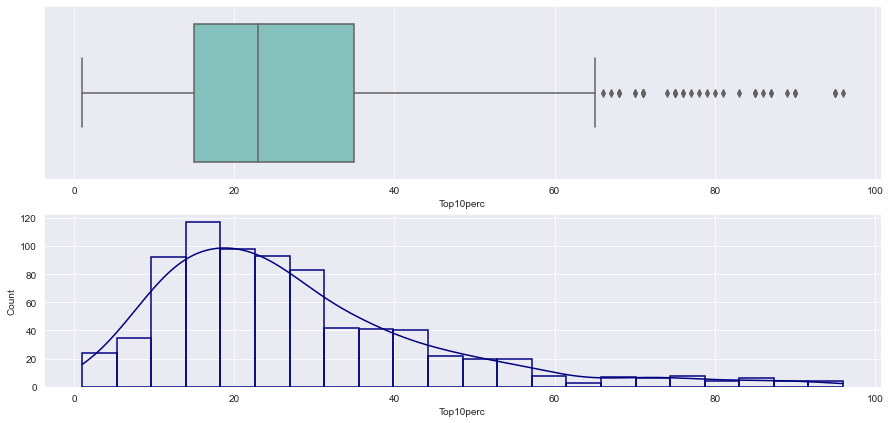

Univariate Analysis for column: Top25perc
---------------------------------------------------

count   777.0000
mean     55.7967
std      19.8048
min       9.0000
25%      41.0000
50%      54.0000
75%      69.0000
max     100.0000
Name: Top25perc, dtype: float64
---------------------------------------------------

Top25perc variable does not have any outliers


Skewnes of the column is = 1.410487098842332
	Hence, the column is positively skewed or right skewed and is not normally distributed.



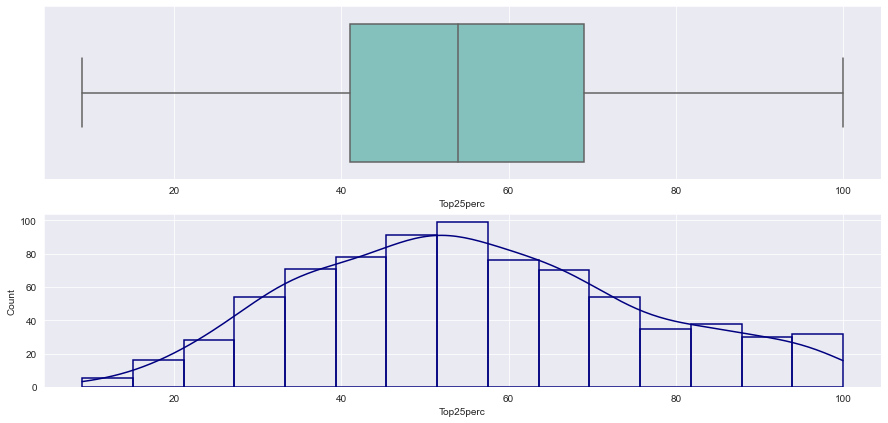

Univariate Analysis for column: F.Undergrad
---------------------------------------------------

count      777.0000
mean     3,699.9073
std      4,850.4205
min        139.0000
25%        992.0000
50%      1,707.0000
75%      4,005.0000
max     31,643.0000
Name: F.Undergrad, dtype: float64
---------------------------------------------------

F.Undergrad variable has outliers


Skewnes of the column is = 0.2588394269741162
	Hence, the column is positively skewed or right skewed and is not normally distributed.



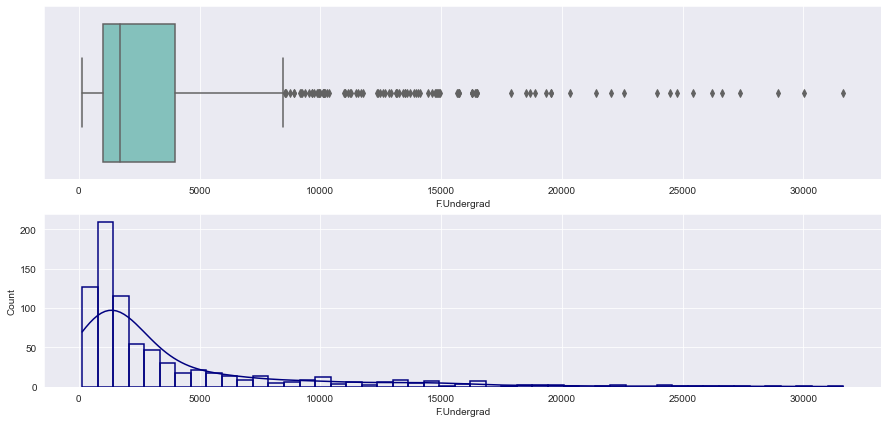

Univariate Analysis for column: P.Undergrad
---------------------------------------------------

count      777.0000
mean       855.2986
std      1,522.4319
min          1.0000
25%         95.0000
50%        353.0000
75%        967.0000
max     21,836.0000
Name: P.Undergrad, dtype: float64
---------------------------------------------------

P.Undergrad variable has outliers


Skewnes of the column is = 2.6054157486361564
	Hence, the column is positively skewed or right skewed and is not normally distributed.



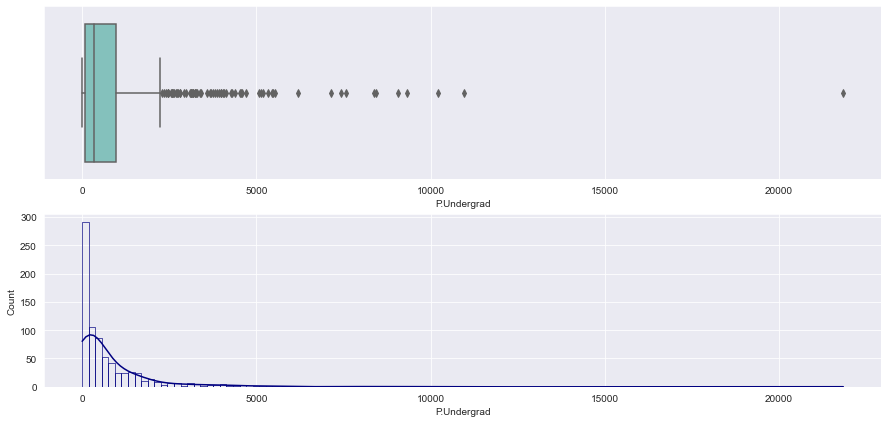

Univariate Analysis for column: Outstate
---------------------------------------------------

count      777.0000
mean    10,440.6692
std      4,023.0165
min      2,340.0000
25%      7,320.0000
50%      9,990.0000
75%     12,925.0000
max     21,700.0000
Name: Outstate, dtype: float64
---------------------------------------------------

Outstate variable does not have any outliers


Skewnes of the column is = 5.681358169711681
	Hence, the column is positively skewed or right skewed and is not normally distributed.



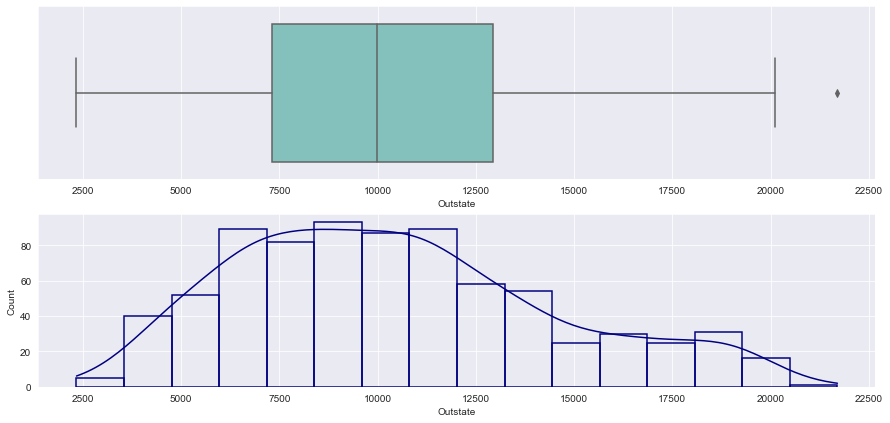

Univariate Analysis for column: Room.Board
---------------------------------------------------

count     777.0000
mean    4,357.5264
std     1,096.6964
min     1,780.0000
25%     3,597.0000
50%     4,200.0000
75%     5,050.0000
max     8,124.0000
Name: Room.Board, dtype: float64
---------------------------------------------------

Room.Board variable has outliers


Skewnes of the column is = 0.508294284359404
	Hence, the column is positively skewed or right skewed and is not normally distributed.



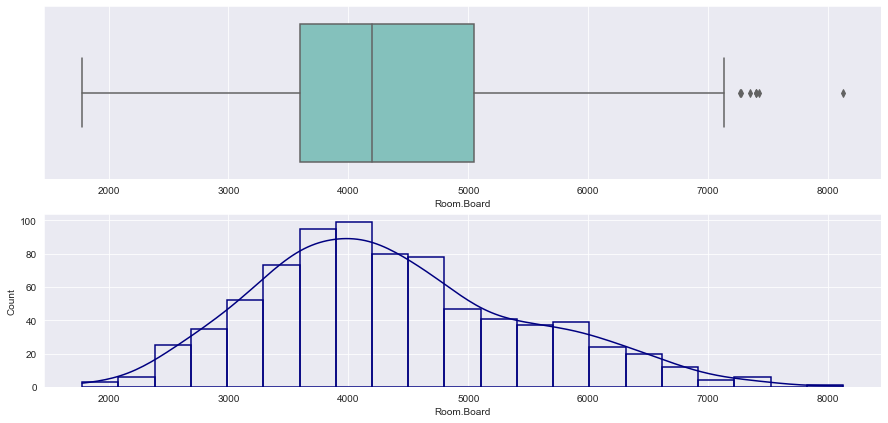

Univariate Analysis for column: Books
---------------------------------------------------

count     777.0000
mean      549.3810
std       165.1054
min        96.0000
25%       470.0000
50%       500.0000
75%       600.0000
max     2,340.0000
Name: Books, dtype: float64
---------------------------------------------------

Books variable has outliers


Skewnes of the column is = 0.4764335489968277
	Hence, the column is positively skewed or right skewed and is not normally distributed.



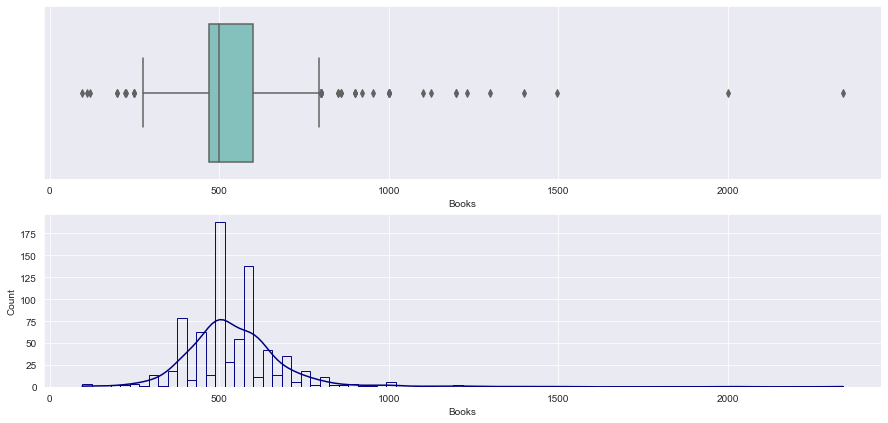

Univariate Analysis for column: Personal
---------------------------------------------------

count     777.0000
mean    1,340.6422
std       677.0715
min       250.0000
25%       850.0000
50%     1,200.0000
75%     1,700.0000
max     6,800.0000
Name: Personal, dtype: float64
---------------------------------------------------

Personal variable has outliers


Skewnes of the column is = 3.478293278376379
	Hence, the column is positively skewed or right skewed and is not normally distributed.



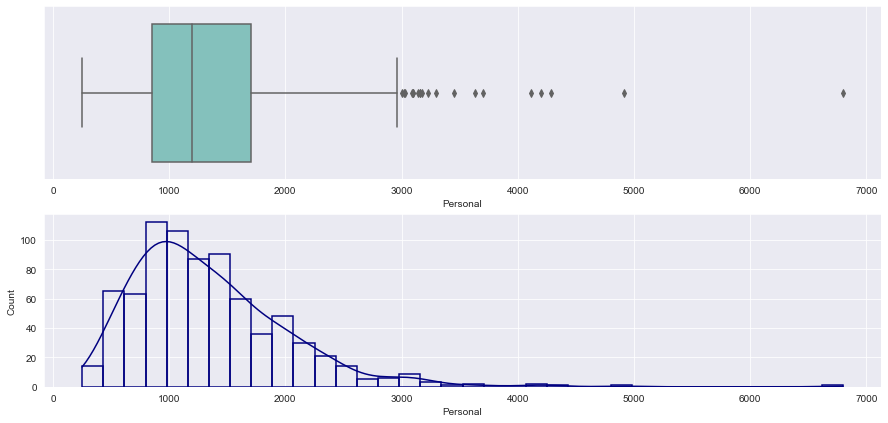

Univariate Analysis for column: PhD
---------------------------------------------------

count   777.0000
mean     72.6602
std      16.3282
min       8.0000
25%      62.0000
50%      75.0000
75%      85.0000
max     103.0000
Name: PhD, dtype: float64
---------------------------------------------------

PhD variable has outliers


Skewnes of the column is = 1.7391308384291781
	Hence, the column is positively skewed or right skewed and is not normally distributed.



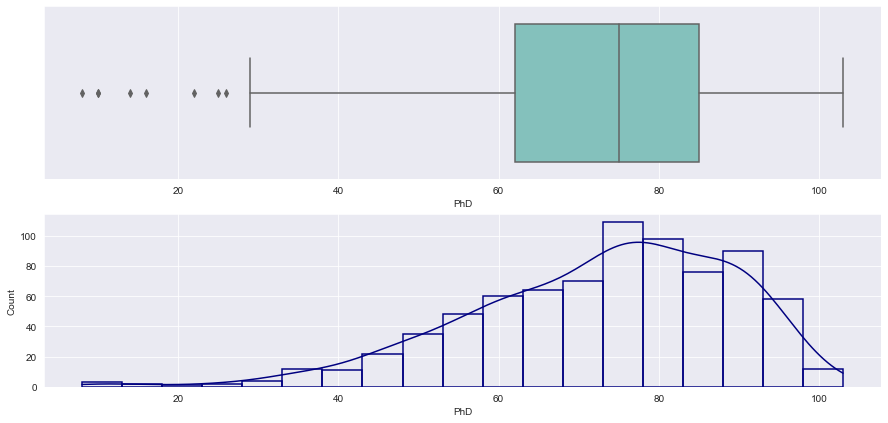

Univariate Analysis for column: Terminal
---------------------------------------------------

count   777.0000
mean     79.7027
std      14.7224
min      24.0000
25%      71.0000
50%      82.0000
75%      92.0000
max     100.0000
Name: Terminal, dtype: float64
---------------------------------------------------

Terminal variable has outliers


Skewnes of the column is = -0.7666863621506335
	Hence, the column is negatively skewed or left skewed and is not normally distributed.



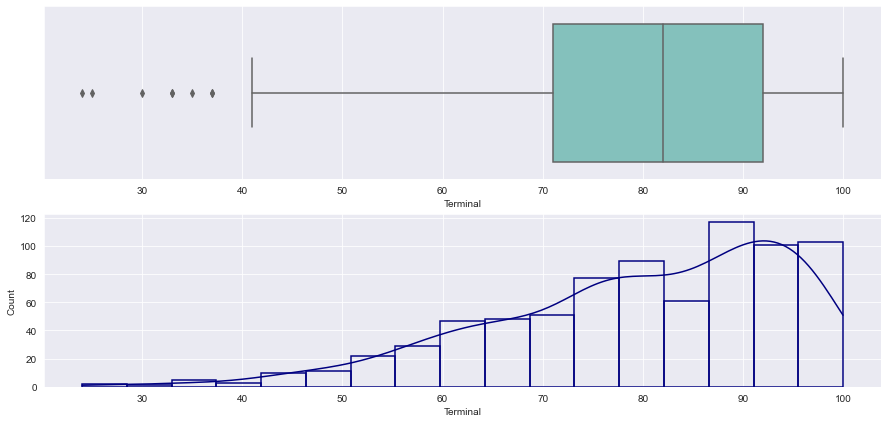

Univariate Analysis for column: S.F.Ratio
---------------------------------------------------

count   777.0000
mean     14.0897
std       3.9583
min       2.5000
25%      11.5000
50%      13.6000
75%      16.5000
max      39.8000
Name: S.F.Ratio, dtype: float64
---------------------------------------------------

S.F.Ratio variable has outliers


Skewnes of the column is = -0.8149651536781263
	Hence, the column is negatively skewed or left skewed and is not normally distributed.



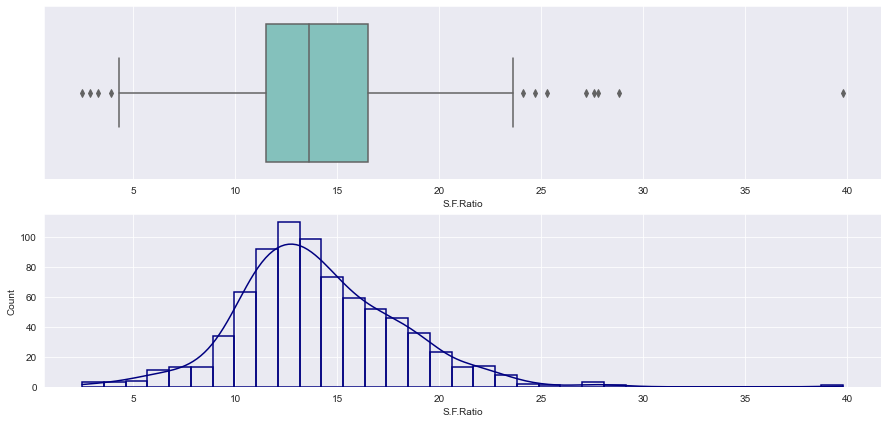

Univariate Analysis for column: perc.alumni
---------------------------------------------------

count   777.0000
mean     22.7439
std      12.3918
min       0.0000
25%      13.0000
50%      21.0000
75%      31.0000
max      64.0000
Name: perc.alumni, dtype: float64
---------------------------------------------------

perc.alumni variable has outliers


Skewnes of the column is = 0.6661461873546756
	Hence, the column is positively skewed or right skewed and is not normally distributed.



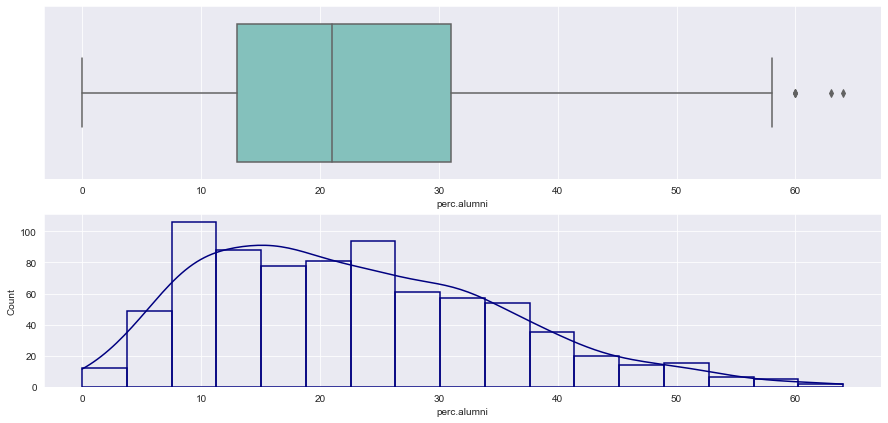

Univariate Analysis for column: Expend
---------------------------------------------------

count      777.0000
mean     9,660.1712
std      5,221.7684
min      3,186.0000
25%      6,751.0000
50%      8,377.0000
75%     10,830.0000
max     56,233.0000
Name: Expend, dtype: float64
---------------------------------------------------

Expend variable has outliers


Skewnes of the column is = 0.6057189848601131
	Hence, the column is positively skewed or right skewed and is not normally distributed.



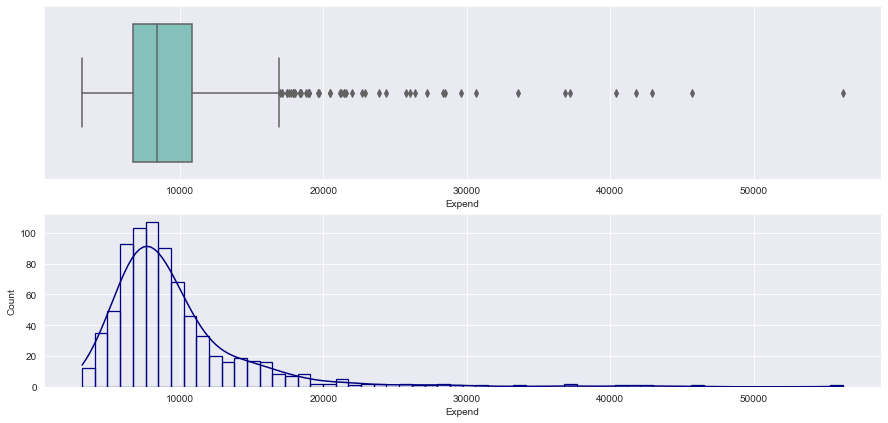

Univariate Analysis for column: Grad.Rate
---------------------------------------------------

count   777.0000
mean     65.4633
std      17.1777
min      10.0000
25%      53.0000
50%      65.0000
75%      78.0000
max     118.0000
Name: Grad.Rate, dtype: float64
---------------------------------------------------

Grad.Rate variable has outliers


Skewnes of the column is = 3.4526399033472197
	Hence, the column is positively skewed or right skewed and is not normally distributed.



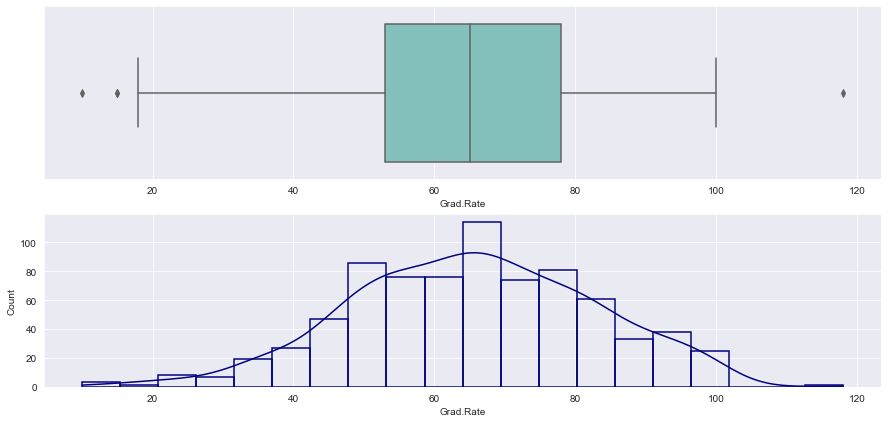

In [29]:
for i in numerical:
    print('Univariate Analysis for column:',i)
    print('-----------------'*3)
    print()
    print(education[i].describe())
    print('-----------------'*3)
    print()
    
    z = np.abs(stats.zscore(education[i]))
    
    if (z>3).any() == True or (z<-3).any() == True:
        print(i,'variable has outliers')
    else:
        print(i,'variable does not have any outliers')
    
    
    if a > 0:
        print('\n\nSkewnes of the column is = {}\n\tHence, the column is positively skewed or right skewed and is not normally distributed.'.format(a))
    elif a < 0:
        print('\n\nSkewnes of the column is = {}\n\tHence, the column is negatively skewed or left skewed and is not normally distributed.'.format(a))
    else:
        print('\n\nSkewnes of the column is = {}\n\tHence, the column is normally distributed'.format(a))
    print()
    fig,axes = plt.subplots(2,1,figsize=[15,7])
    sns.boxplot(education[i],ax=axes[0],palette='GnBu')
    sns.histplot(education[i],kde=True,fill=False,color='navy',ax=axes[1])
    plt.show()
    a = skew(education[i])


__Analysis__


Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data.

> All the numeric variables are skewed and hence, are not normally distributed.


While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

> Based on z-scores, all the variables have outliers except Top25perc and Outstate.

### Bivariate Analysis 

### Numerical against Numerical


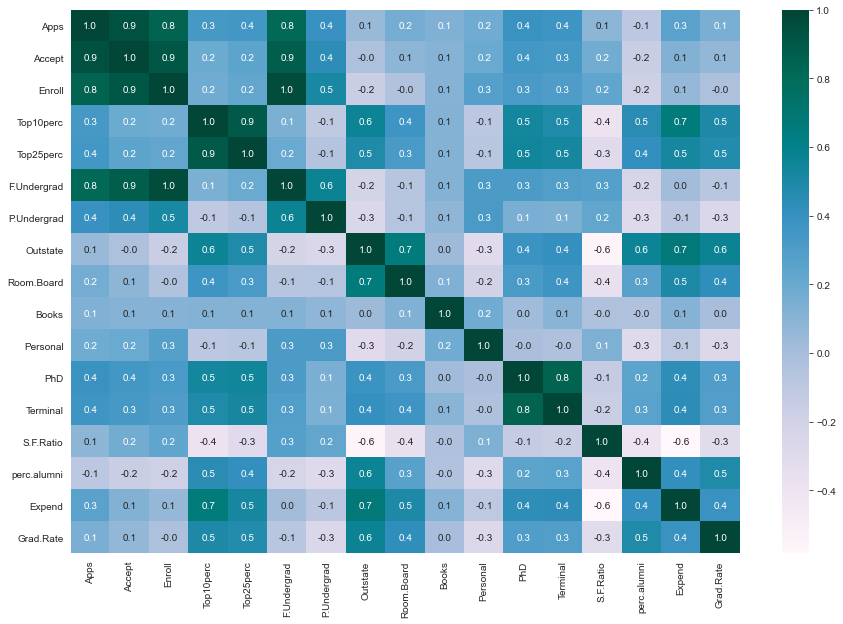

In [30]:
plt.figure(figsize=[15,10])
sns.heatmap(education.corr(),cmap='PuBuGn',annot=True,fmt='.1f');

__Analysis__


> Apps, Accept and Enroll has a high and positive correlation with F.Undergrad.

> Outstate has a high correlation with Expend, Room Board and Top10perc. Top10perc is also highly correlated with Top25perc.

> Outstate and S.F.Ratio (student faculty ratio) are negatively correlated. S.F Ratio is also negatively correlated with Top10perc, Room Board and Expend. 

### Bivariate Analysis 

### Numerical against Categorical

### 10 Universities or Colleges with least number of Graduation rate

In [31]:
grad = education.sort_values(by='Grad.Rate',ascending=True)
grad = grad.loc[:,['Names','Grad.Rate']]
grad = grad.iloc[:10,:]
grad

,Names,Grad.Rate
585,Texas Southern University,10
384,Montreat-Anderson College,15
4,Alaska Pacific University,15
66,Brewton-Parker College,18
394,Mount Saint Clare College,21
113,Claflin College,21
264,Huron University,21
198,Ferrum College,22
197,Fayetteville State University,24
98,Centenary College,24


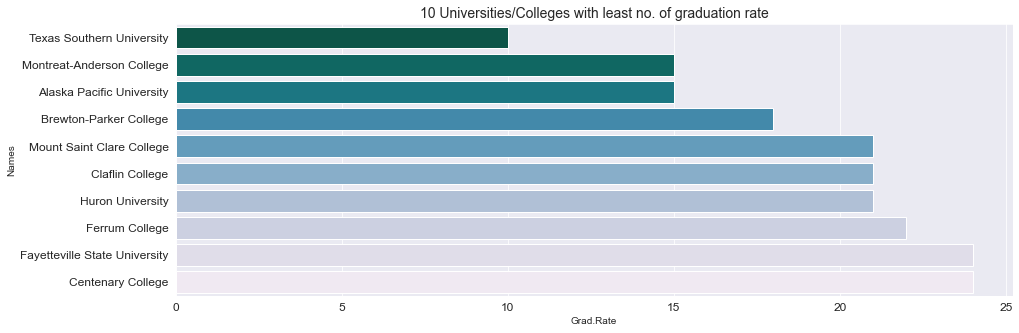

In [32]:
plt.figure(figsize=[15,5])
sns.barplot(y=grad.Names,x=grad['Grad.Rate'],palette='PuBuGn_r')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('10 Universities/Colleges with least no. of graduation rate',fontsize=14);


__Analysis__

Texas Southern University has the least number of graduation rate followed by Montreat-Anderson College and Alaska Pacific University.

### Top 10 Universities or Colleges with highest applications received

In [33]:
apps = education.sort_values(by='Apps',ascending=False)
apps = apps.loc[:,['Names','Apps']]
apps = apps.iloc[:10,:]
apps

,Names,Apps
483,Rutgers at New Brunswick,48094
461,Purdue University at West Lafayette,21804
59,Boston University,20192
605,University of California at Berkeley,19873
445,Pennsylvania State Univ. Main Campus,19315
637,University of Michigan at Ann Arbor,19152
366,Michigan State University,18114
274,Indiana University at Bloomington,16587
693,University of Virginia,15849
713,Virginia Tech,15712


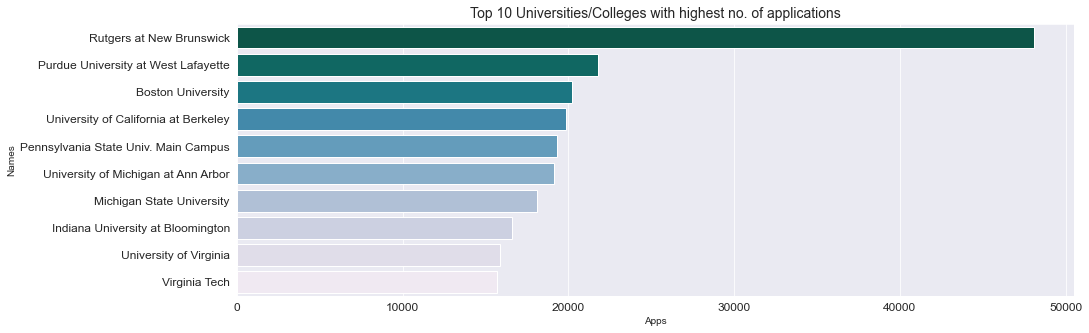

In [34]:
plt.figure(figsize=[15,5])
sns.barplot(y=apps.Names,x=apps['Apps'],palette='PuBuGn_r')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Top 10 Universities/Colleges with highest no. of applications',fontsize=14);


__Analysis__

`Rutgers at New Brunswick` is the leading university with the highest of 48094 number of applications received. The second leading university `Purdue University at West Lafayette` has 21804 number of applications which is approx half of Rutgers at New Brunswick

### 10 Universities/Colleges with least no. of applications accepted

In [35]:
accept = education.sort_values(by='Apps',ascending=False)
accept = accept.loc[:,['Names','Accept','Apps']]
accept = accept.iloc[:10,:]
accept = accept.sort_values(by='Accept',ascending=True)
accept

,Names,Accept,Apps
693,University of Virginia,5384,15849
605,University of California at Berkeley,8252,19873
445,Pennsylvania State Univ. Main Campus,10344,19315
713,Virginia Tech,11719,15712
637,University of Michigan at Ann Arbor,12940,19152
59,Boston University,13007,20192
274,Indiana University at Bloomington,13243,16587
366,Michigan State University,15096,18114
461,Purdue University at West Lafayette,18744,21804
483,Rutgers at New Brunswick,26330,48094


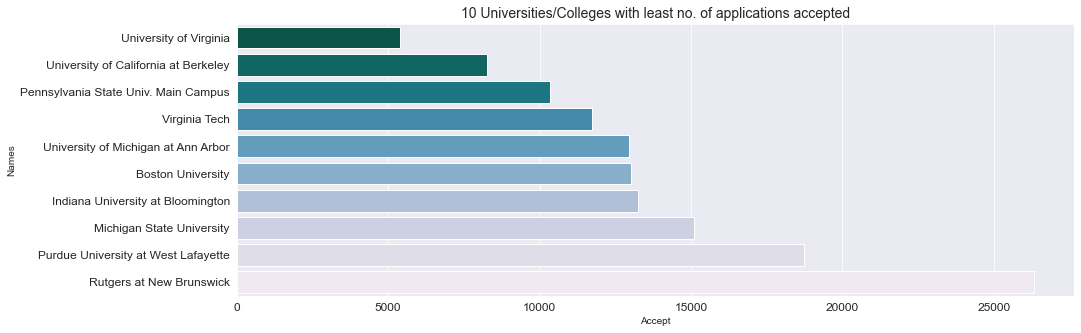

In [36]:
plt.figure(figsize=[15,5])
sns.barplot(y=accept.Names,x=accept['Accept'],palette='PuBuGn_r')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('10 Universities/Colleges with least no. of applications accepted',fontsize=14);


__Analysis__

`University of Virginia` has received 15849 applications outof which only 5384 were accepted i.e. only 33.97% of the total applications received was accepted.

### Multivariate Analysis 

### Top universities with highest no. of applications Rejected, Enrolled and Accepted but not enrolled

In [37]:
apps = education.pivot_table(index=education.Names,values=education[['Apps','Accept','Enroll']]).sort_values(by='Apps',ascending=False)
apps = apps.iloc[:10,:]
apps['Rejected'] = apps['Apps'] - apps['Accept']
apps['Accepted_NotEnrolled'] = apps['Accept'] - apps['Enroll']
apps.drop('Apps',axis=1,inplace=True)
apps.drop('Accept',axis=1,inplace=True)
apps

,Enroll,Rejected,Accepted_NotEnrolled
Names,,,
Rutgers at New Brunswick,4520,21764,21810
Purdue University at West Lafayette,5874,3060,12870
Boston University,3810,7185,9197
University of California at Berkeley,3215,11621,5037
Pennsylvania State Univ. Main Campus,3450,8971,6894
University of Michigan at Ann Arbor,4893,6212,8047
Michigan State University,6180,3018,8916
Indiana University at Bloomington,5873,3344,7370
University of Virginia,2678,10465,2706


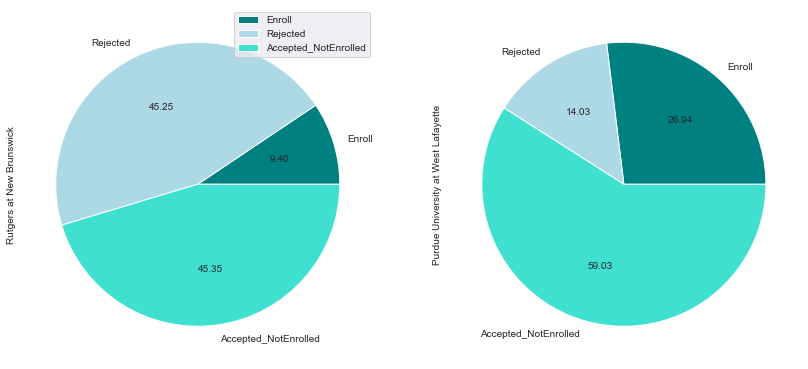

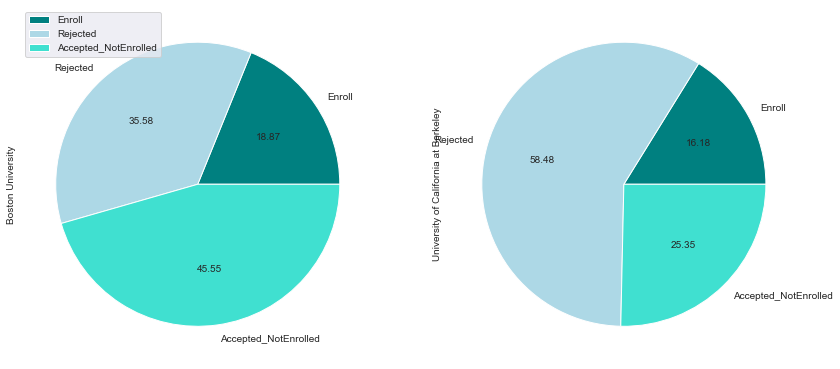

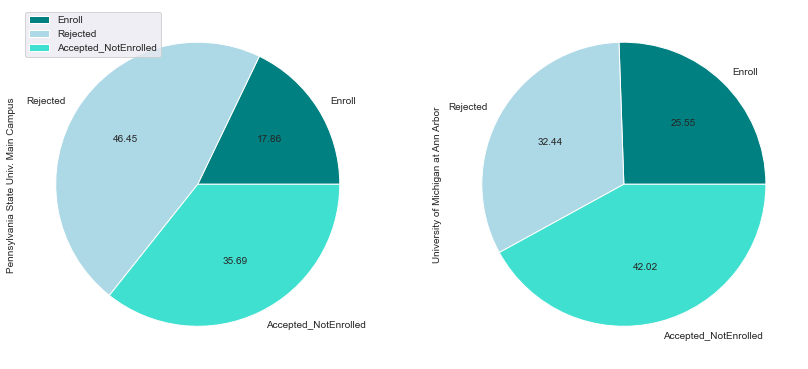

In [38]:
apps.T.iloc[:,:2].plot.pie(subplots=True,colors=['teal','lightblue','turquoise'],autopct='%.2f',figsize=[14,10],textprops={'fontsize': 10})
plt.legend('',frameon=False)
apps.T.iloc[:,2:4].plot.pie(subplots=True,colors=['teal','lightblue','turquoise'],autopct='%.2f',figsize=[14,10],textprops={'fontsize': 10})
plt.legend('',frameon=False)
apps.T.iloc[:,4:6].plot.pie(subplots=True,colors=['teal','lightblue','turquoise'],autopct='%.2f',figsize=[14,10],textprops={'fontsize': 10})
plt.legend('',frameon=False);

__Analyses__

*Rutgers at New Brunswick* - Out of total applications received: only 9.4% students were enrolled, 45.25% were rejected and 45.35% were accecpted but the students did not enrolled.

*Purdue University at West Lafayette* - Out of total applications received: only 26.94% students were enrolled, 14.03% were rejected and 59.03% were accecpted but the students did not enrolled.

*Pennsylvania State Univ. Main Campus* - Out of total applications received: only 17.86% students were enrolled, 46.45% were rejected and 35.69% were accecpted but the students did not enrolled.

*University of Michigan at Ann Arbor* - Out of total applications received: only 25.55% students were enrolled, 32.44% were rejected and 42.02% were accecpted but the students did not enrolled.

*Boston University* - Out of total applications received: only 18.87% students were enrolled, 35.58% were rejected and 45.55% were accecpted but the students did not enrolled.

*University of California at Berkeley* - Out of total applications received: only 16.18% students were enrolled, 58.48% were rejected and 25.35% were accecpted but the students did not enrolled.

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.(2)


The goal of scaling is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

PCA is necessary to normalize the data. The PCA calculates a new projection of the data set. If one component (e.g. meters) varies less than another does (e.g. kg) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘kilos’ axis, if those features are not scaled. Thus leading to incorrect results.

In this case, perc.alumni, Terminal, Top10perc and Top25perc are in percetage. S.F Ratio is the student/faculty ratio and most the columns are the total number of sudents for a particular column. This alone concludes that the variables of the data are not of same scale. Hence, scaling is necessary for PCA in this case.

In [39]:
education_num = education.select_dtypes(include=['float64', 'int64'])
education_num.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1000,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2000,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9000,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7000,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9000,2,10922,15


### Scaling

In [40]:
# Scaling the data - using scikit learn standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(education_num),columns=list(education_num))
df_num_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.3469,-0.3212,-0.0635,-0.2586,-0.1918,-0.1681,-0.2092,-0.7464,-0.9649,-0.6023,1.2700,-0.1630,-0.1157,1.0138,-0.8676,-0.5019,-0.3183
1,-0.2109,-0.0387,-0.2886,-0.6557,-1.3539,-0.2098,0.2443,0.4575,1.9092,1.2159,0.2355,-2.6756,-3.3782,-0.4777,-0.5446,0.1661,-0.5513
2,-0.4069,-0.3763,-0.4781,-0.3153,-0.2929,-0.5496,-0.4971,0.2013,-0.5543,-0.9053,-0.2596,-1.2048,-0.9313,-0.3007,0.5859,-0.1773,-0.6678
3,-0.6683,-0.6817,-0.6924,1.8402,1.6776,-0.6581,-0.5208,0.6266,0.9968,-0.6023,-0.6882,1.1852,1.1757,-1.6153,1.1512,1.7929,-0.3765
4,-0.7262,-0.7646,-0.7807,-0.6557,-0.5960,-0.7119,0.0090,-0.7165,-0.2167,1.5189,0.2355,0.2047,-0.5235,-0.5535,-1.6751,0.2418,-2.9396


## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data].(3)


In [41]:
# Generating the correlation matrix on the scaled data

corr = df_num_scaled.corr(method='pearson')
corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.0000,0.9435,0.8468,0.3388,0.3516,0.8145,0.3983,0.0502,0.1649,0.1326,0.1787,0.3907,0.3695,0.0956,-0.0902,0.2596,0.1468
Accept,0.9435,1.0000,0.9116,0.1924,0.2475,0.8742,0.4413,-0.0258,0.0909,0.1135,0.2010,0.3558,0.3376,0.1762,-0.1600,0.1247,0.0673
Enroll,0.8468,0.9116,1.0000,0.1813,0.2267,0.9646,0.5131,-0.1555,-0.0402,0.1127,0.2809,0.3315,0.3083,0.2373,-0.1808,0.0642,-0.0223
Top10perc,0.3388,0.1924,0.1813,1.0000,0.8920,0.1413,-0.1054,0.5623,0.3715,0.1189,-0.0933,0.5318,0.4911,-0.3849,0.4555,0.6609,0.4950
Top25perc,0.3516,0.2475,0.2267,0.8920,1.0000,0.1994,-0.0536,0.4894,0.3315,0.1155,-0.0808,0.5459,0.5247,-0.2946,0.4179,0.5274,0.4773
F.Undergrad,0.8145,0.8742,0.9646,0.1413,0.1994,1.0000,0.5705,-0.2157,-0.0689,0.1155,0.3172,0.3183,0.3000,0.2797,-0.2295,0.0187,-0.0788
P.Undergrad,0.3983,0.4413,0.5131,-0.1054,-0.0536,0.5705,1.0000,-0.2535,-0.0613,0.0812,0.3199,0.1491,0.1419,0.2325,-0.2808,-0.0836,-0.2570
Outstate,0.0502,-0.0258,-0.1555,0.5623,0.4894,-0.2157,-0.2535,1.0000,0.6543,0.0389,-0.2991,0.3830,0.4080,-0.5548,0.5663,0.6728,0.5713
Room.Board,0.1649,0.0909,-0.0402,0.3715,0.3315,-0.0689,-0.0613,0.6543,1.0000,0.1280,-0.1994,0.3292,0.3745,-0.3626,0.2724,0.5017,0.4249
Books,0.1326,0.1135,0.1127,0.1189,0.1155,0.1155,0.0812,0.0389,0.1280,1.0000,0.1793,0.0269,0.1000,-0.0319,-0.0402,0.1124,0.0011


In [42]:
# Generating the covariance matrix on the scaled data - ( This will be similar to the correlation matrix)

cov_matrix = np.cov(df_num_scaled.T)
cov_mat= pd.DataFrame(cov_matrix,index = list(df_num_scaled),columns = list(df_num_scaled))
cov_mat

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.0013,0.9447,0.8479,0.3393,0.3521,0.8155,0.3988,0.0502,0.1652,0.1327,0.1790,0.3912,0.3700,0.0958,-0.0903,0.2599,0.1469
Accept,0.9447,1.0013,0.9128,0.1927,0.2478,0.8753,0.4418,-0.0258,0.0910,0.1137,0.2012,0.3562,0.3380,0.1765,-0.1602,0.1249,0.0674
Enroll,0.8479,0.9128,1.0013,0.1815,0.2270,0.9659,0.5137,-0.1557,-0.0403,0.1129,0.2813,0.3319,0.3087,0.2376,-0.1810,0.0643,-0.0224
Top10perc,0.3393,0.1927,0.1815,1.0013,0.8931,0.1415,-0.1055,0.5631,0.3720,0.1190,-0.0934,0.5325,0.4918,-0.3854,0.4561,0.6618,0.4956
Top25perc,0.3521,0.2478,0.2270,0.8931,1.0013,0.1997,-0.0536,0.4900,0.3319,0.1157,-0.0809,0.5466,0.5254,-0.2950,0.4184,0.5281,0.4779
F.Undergrad,0.8155,0.8753,0.9659,0.1415,0.1997,1.0013,0.5712,-0.2160,-0.0690,0.1157,0.3176,0.3187,0.3004,0.2801,-0.2298,0.0187,-0.0789
P.Undergrad,0.3988,0.4418,0.5137,-0.1055,-0.0536,0.5712,1.0013,-0.2538,-0.0614,0.0813,0.3203,0.1493,0.1421,0.2328,-0.2812,-0.0837,-0.2573
Outstate,0.0502,-0.0258,-0.1557,0.5631,0.4900,-0.2160,-0.2538,1.0013,0.6551,0.0389,-0.2995,0.3835,0.4085,-0.5555,0.5670,0.6736,0.5720
Room.Board,0.1652,0.0910,-0.0403,0.3720,0.3319,-0.0690,-0.0614,0.6551,1.0013,0.1281,-0.1997,0.3296,0.3750,-0.3631,0.2727,0.5024,0.4255
Books,0.1327,0.1137,0.1129,0.1190,0.1157,0.1157,0.0813,0.0389,0.1281,1.0013,0.1795,0.0269,0.1001,-0.0320,-0.0403,0.1126,0.0011


__Interpretation__

Both Correlation and Covariance are very closely related to each other and yet they differ a lot. 

A covariance matrix is used to study the direction of the linear relationship between variables. A correlation matrix is used to study the strength of a relationship between two variables.

Covariance vs Correlation, the latter stands to be the most preferred choice as it remains unaffected by the change in dimensions, location, and scale, and can also be used to make a comparison between two pairs of variables. Since it is limited to a range of -1 to +1, it is useful to draw comparisons between variables across domains. However, an important limitation is that both these concepts measure the only linear relationship.

## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?(3)


### Before scaling

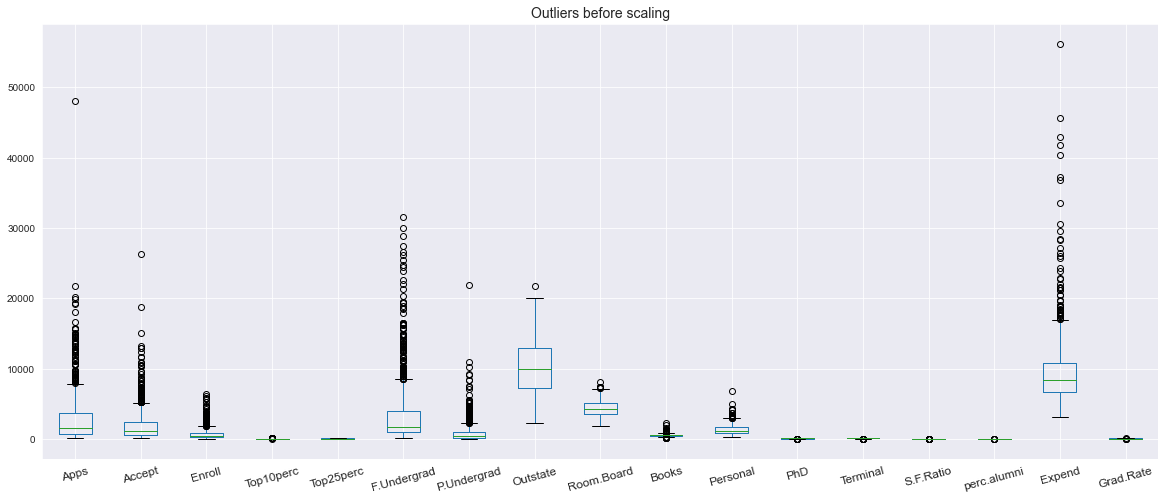

In [43]:
education_num.plot.box(figsize=[20,8])
plt.xticks(fontsize=12,rotation=15)
plt.title('Outliers before scaling',fontsize=14);

### After scaling

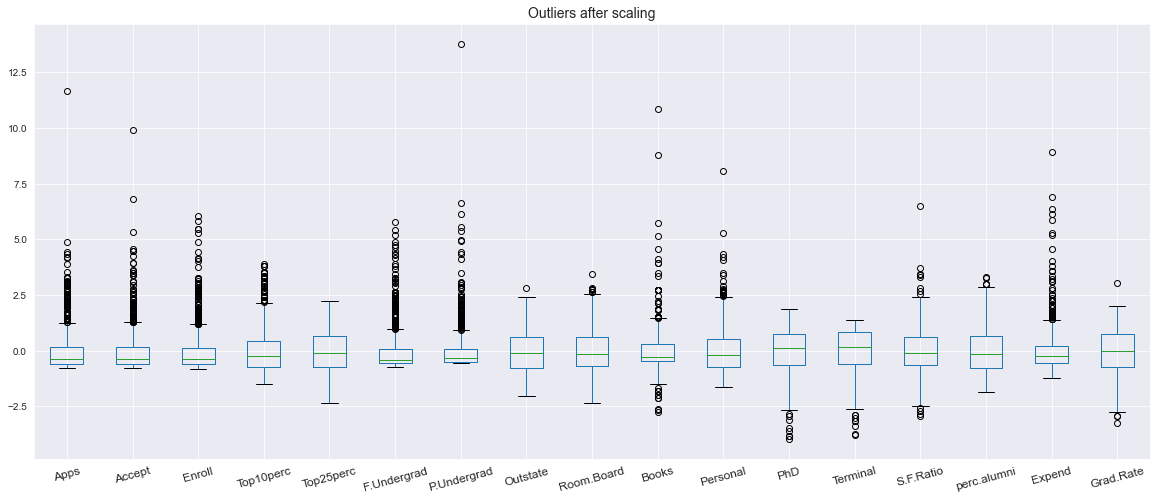

In [44]:
df_num_scaled.plot.box(figsize=[20,8])
plt.xticks(fontsize=12,rotation=15)
plt.title('Outliers after scaling',fontsize=14);

__Insights__

Before scaling the variables were on different scale as we can see in the figure *Outliers before scaling*. The scaling shrinked the range of the feature values and median is now close to 0 as shown in figure *Outliers after scaling*.

## 2.5 Extract the eigenvalues and eigenvectors.[print both].(4)


In [45]:
# Calculating the Eigen values and Eigen vectors
eig_vals,eig_vecs = np.linalg.eig(cov_matrix)

print('Eigen Values:')
print(eig_vals)
print()
print('Eigen Vectors:')
print(eig_vecs.T)

Eigen Values:
[5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]

Eigen Vectors:
[[-2.48765602e-01 -2.07601502e-01 -1.76303592e-01 -3.54273947e-01
  -3.44001279e-01 -1.54640962e-01 -2.64425045e-02 -2.94736419e-01
  -2.49030449e-01 -6.47575181e-02  4.25285386e-02 -3.18312875e-01
  -3.17056016e-01  1.76957895e-01 -2.05082369e-01 -3.18908750e-01
  -2.52315654e-01]
 [ 3.31598227e-01  3.72116750e-01  4.03724252e-01 -8.24118211e-02
  -4.47786551e-02  4.17673774e-01  3.15087830e-01 -2.49643522e-01
  -1.37808883e-01  5.63418434e-02  2.19929218e-01  5.83113174e-02
   4.64294477e-02  2.46665277e-01 -2.46595274e-01 -1.31689865e-01
  -1.69240532e-01]
 [ 6.30921033e-02  1.01249056e-01  8.29855709e-02 -3.50555339e-02
   2.41479376e-02  6.13929764e-02 -1.39681716e-01 -4.65988731e-02
  -1.48967389e-01 -6.77411649e-01 -4.99721120e-01  1.27028371e-01
   6.60375454e-

## 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features(4)

In [46]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
print('p_value:',p_value)

p_value: 0.0


In [47]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
print('kmo_model:',kmo_model)

kmo_model: 0.8131251200373522


In [48]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


In [49]:
# Variance Explained - Eigen values
eigen_values = pd.DataFrame({'Eigen_Values':eig_vals,'Cumulative_Variance_Explained':cum_var_exp})
eigen_values['Variance_Explained'] = eigen_values['Eigen_Values']/eigen_values['Eigen_Values'].sum()*100
eigen_values = eigen_values[['Eigen_Values','Variance_Explained','Cumulative_Variance_Explained']]
# eigen_values.to_csv('Home_Loan_Eigen_Values.csv')
eigen_values

,Eigen_Values,Variance_Explained,Cumulative_Variance_Explained
0,5.4505,32.0206,32.0206
1,4.4836,26.3402,58.3608
2,1.1747,6.9009,65.2618
3,1.0082,5.9230,71.1847
4,0.9342,5.4884,76.6732
5,0.8485,4.9847,81.6579
6,0.6058,3.5589,85.2167
7,0.5879,3.4536,88.6703
8,0.5306,3.1172,91.7876
9,0.4043,2.3752,94.1628


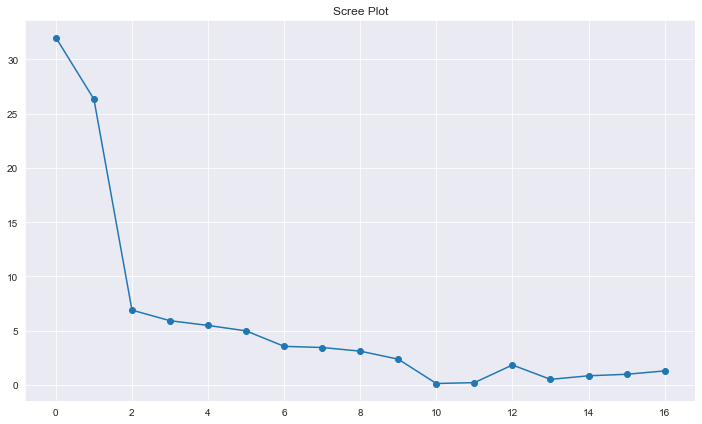

In [50]:
# Visualizing the variance explained
plt.figure(figsize=(12,7))
eigen_values['Variance_Explained'].plot.line(marker='o')
plt.title('Scree Plot');

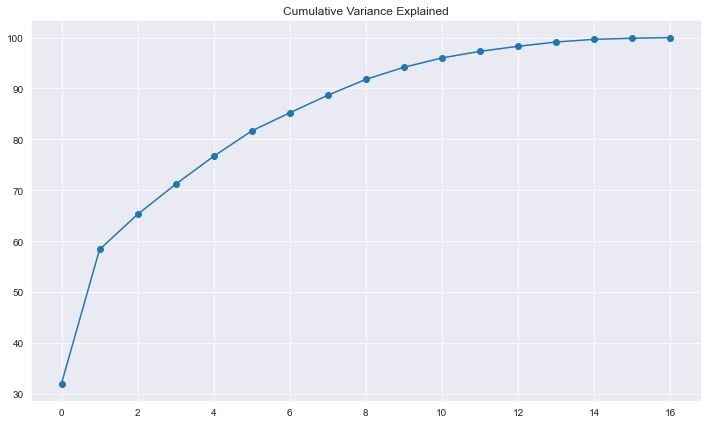

In [51]:
# Visualizing the cumulative variance explained
plt.figure(figsize=(12,7))
eigen_values['Cumulative_Variance_Explained'].plot.line(marker='o')
plt.title('Cumulative Variance Explained');

In [52]:
# Eigen Vectors
eigen_vectors = pd.DataFrame(eig_vecs.T,columns=list(df_num_scaled))
# eigen_vectors.to_csv('Home_Loan_Eigen_Vectors.csv')
eigen_vectors

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.2488,-0.2076,-0.1763,-0.3543,-0.3440,-0.1546,-0.0264,-0.2947,-0.2490,-0.0648,0.0425,-0.3183,-0.3171,0.1770,-0.2051,-0.3189,-0.2523
1,0.3316,0.3721,0.4037,-0.0824,-0.0448,0.4177,0.3151,-0.2496,-0.1378,0.0563,0.2199,0.0583,0.0464,0.2467,-0.2466,-0.1317,-0.1692
2,0.0631,0.1012,0.0830,-0.0351,0.0241,0.0614,-0.1397,-0.0466,-0.1490,-0.6774,-0.4997,0.1270,0.0660,0.2898,0.1470,-0.2267,0.2081
3,-0.2813,-0.2678,-0.1618,0.0515,0.1098,-0.1004,0.1586,-0.1313,-0.1850,-0.0871,0.2307,0.5347,0.5194,0.1612,-0.0173,-0.0793,-0.2691
4,0.0057,0.0558,-0.0557,-0.3954,-0.4265,-0.0435,0.3024,0.2225,0.5609,-0.1273,-0.2223,0.1402,0.2047,-0.0794,-0.2163,0.0760,-0.1093
5,0.0162,-0.0075,0.0426,0.0527,-0.0331,0.0435,0.1912,0.0300,-0.1628,-0.6411,0.3314,-0.0913,-0.1549,-0.4870,0.0473,0.2981,-0.2162
6,0.0425,0.0129,0.0277,0.1613,0.1185,0.0251,-0.0610,-0.1085,-0.2097,0.1497,-0.6338,0.0011,0.0285,-0.2193,-0.2433,0.2266,-0.5599
7,0.1031,0.0563,-0.0587,0.1227,0.1025,-0.0789,-0.5708,-0.0098,0.2215,-0.2133,0.2327,0.0770,0.0122,0.0836,-0.6785,0.0542,0.0053
8,0.0902,0.1779,0.1286,-0.3411,-0.4037,0.0594,-0.5607,0.0046,-0.2750,0.1337,0.0945,0.1852,0.2549,-0.2745,0.2553,0.0491,-0.0419
9,-0.0525,-0.0411,-0.0345,-0.0640,-0.0145,-0.0208,0.2231,-0.1867,-0.2983,0.0820,-0.1360,0.1235,0.0886,-0.4720,-0.4230,-0.1323,0.5903


In [53]:
# Scikit Learn for PCA
from sklearn.decomposition import PCA
pca_decomp = PCA(n_components=4, random_state=123)
df_pca = pd.DataFrame(pca_decomp.fit_transform(df_num_scaled),columns=['PCA-1','PCA-2','PCA-3','PCA-4'])#,'PCA-5','PCA-6'
df_pca.head()

,PCA-1,PCA-2,PCA-3,PCA-4
0,-1.5929,0.7673,-0.1011,-0.9218
1,-2.1924,-0.5788,2.2788,3.5889
2,-1.4310,-1.0928,-0.4381,0.6772
3,2.8556,-2.6306,0.1417,-1.2955
4,-2.2120,0.0216,2.3870,-1.1145


In [54]:
print('df_pca dimension:',df_pca.shape)

df_pca dimension: (777, 4)


In [55]:
df_pca_comp = pd.DataFrame(pca_decomp.components_,
                           columns=list(df_num_scaled),index=['PCA-1','PCA-2','PCA-3','PCA-4'])#,'PCA-5','PCA-6'

In [56]:
df_pca_comp

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
PCA-1,0.2488,0.2076,0.1763,0.3543,0.3440,0.1546,0.0264,0.2947,0.2490,0.0648,-0.0425,0.3183,0.3171,-0.1770,0.2051,0.3189,0.2523
PCA-2,0.3316,0.3721,0.4037,-0.0824,-0.0448,0.4177,0.3151,-0.2496,-0.1378,0.0563,0.2199,0.0583,0.0464,0.2467,-0.2466,-0.1317,-0.1692
PCA-3,-0.0631,-0.1012,-0.0830,0.0351,-0.0242,-0.0614,0.1397,0.0466,0.1490,0.6774,0.4997,-0.1270,-0.0660,-0.2898,-0.1470,0.2267,-0.2081
PCA-4,0.2813,0.2678,0.1618,-0.0516,-0.1098,0.1004,-0.1586,0.1313,0.1850,0.0871,-0.2307,-0.5347,-0.5194,-0.1612,0.0173,0.0793,0.2691


In [57]:
print('explained_variance:',pca_decomp.explained_variance_)

explained_variance: [5.45052162 4.48360686 1.17466761 1.00820573]


In [58]:
print('explained_variance_ratio:',pca_decomp.explained_variance_ratio_)

explained_variance_ratio: [0.32020628 0.26340214 0.06900917 0.05922989]


In [59]:
pca_decomp.explained_variance_ratio_.cumsum()

array([0.32020628, 0.58360843, 0.65261759, 0.71184748])

## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).(4)


In [60]:
print('Explicit form of the first PC (in terms of the eigenvectors):\n')
for i in range(0,education_num.shape[1]):
    print('{} * {}'.format(np.round(pca_decomp.components_[0][i],2),education_num.columns[i]),end=' + ')

Explicit form of the first PC (in terms of the eigenvectors):

0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate + 


## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?(4)


In [61]:
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


In [62]:
eigen_values

,Eigen_Values,Variance_Explained,Cumulative_Variance_Explained
0,5.4505,32.0206,32.0206
1,4.4836,26.3402,58.3608
2,1.1747,6.9009,65.2618
3,1.0082,5.9230,71.1847
4,0.9342,5.4884,76.6732
5,0.8485,4.9847,81.6579
6,0.6058,3.5589,85.2167
7,0.5879,3.4536,88.6703
8,0.5306,3.1172,91.7876
9,0.4043,2.3752,94.1628


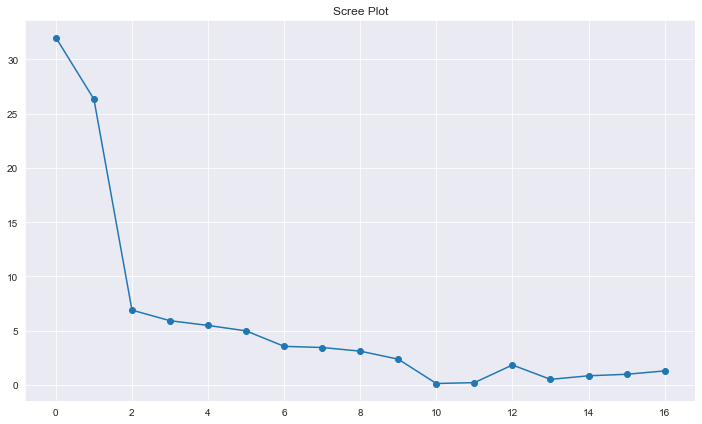

In [63]:
# Visualizing the variance explained
plt.figure(figsize=(12,7))
eigen_values['Variance_Explained'].plot.line(marker='o')
plt.title('Scree Plot');

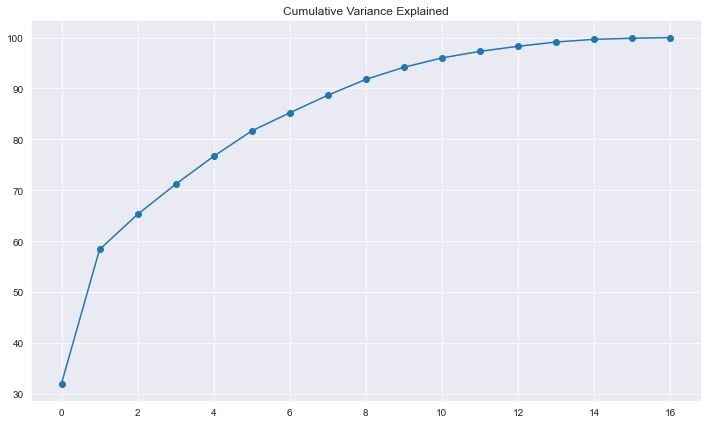

In [64]:
# Visualizing the cumulative variance explained
plt.figure(figsize=(12,7))
eigen_values['Cumulative_Variance_Explained'].plot.line(marker='o')
plt.title('Cumulative Variance Explained');

#### The eigenvalue-one criterion.

In principal component analysis, one of the most commonly used criteria for solving the number-of-components problem is the eigenvalue-one criterion, also known as the Kaiser criterion (Kaiser, 1960). With this approach, you retain and interpret any component with an eigenvalue greater than 1.00. On the other hand, a component with an eigenvalue less than 1.00 is accounting for less variance than had been contributed by one variable and are viewed as trivial, and are not retained.


####  The scree test.

With the scree test (Cattell, 1966), you plot the eigenvalues associated with each component and look for a “break” between the components with relatively large eigenvalues and those with small eigenvalues. The components that appear before the break are assumed to be meaningful and are retained for rotation; those apppearing after the break are assumed to be unimportant and are not retained. 


#### Proportion of variance accounted for


An alternative criterion is to retain enough components so that the cumulative percent of variance accounted for is equal to some minimal value. When researchers use the “cumulative percent of variance accounted for” as the criterion for solving the number-ofcomponents problem, they usually retain enough components so that the cumulative percent of variance accounted for at least 70% (and sometimes 80%). 


#### Based on the above criterion, the first 4 PC have eigenvalue of more than 1 and it accounts for more than approx 70% of the cumulative variance explained (71.19%).


#### Eigen Vector indicates the direction of the principal components (new axes). It determine the directions of the new feature space.

## 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained].(4)


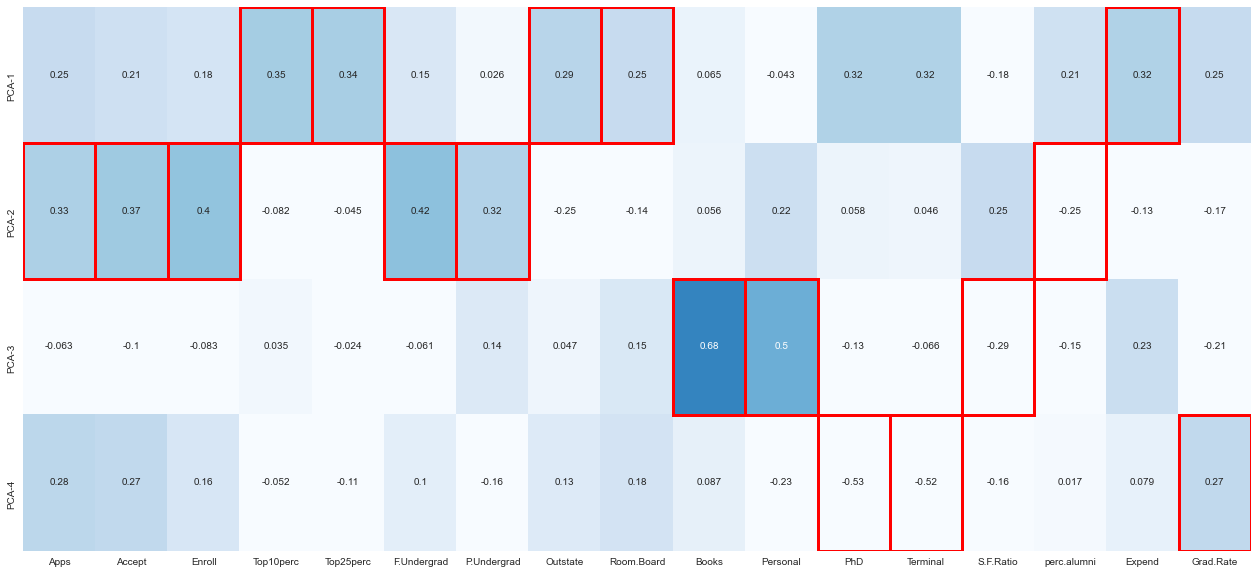

In [65]:
# Understanding the Components or 'Profiling the Components'
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_comp, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PCA-1','PCA-2','PCA-3','PCA-4']) # ,'PCA-5','PCA-6','PCA-7','PCA-8'
column_max = df_pca_comp.abs().idxmax(axis=0) # Finding the variables which have highest loading across each PC

for col, variable in enumerate(df_pca_comp.columns):
    position = df_pca_comp.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3        ))


### Component Summaries

### First Principal Component Analysis - PCA1:

The first principal component is a measure of the quality of Top10pec, Top25perc, Expend and to some extend Outstate and Room.Board. They are all positively correlated to PCA1.


### Second Principal Component Analysis - PCA2:

The second principal component is a measure of the quality of Apps (applications received), Accept and Enroll as well as F.Undergrad and P.Undergrad. They are all positively correlated to PCA2 except perc.alumni which is negatively correlated to PCA2. The second PCA primarily measures the applications of students received, enrolled and accepted and whether they are F.Undergrad or P.Undergrad.


### Third Principal Component Analysis - PCA3:

The third principal component is a measure of the quality of Books, Personal that is positively correlated to PCA3 and S.F Ratio i.e. Student/Faculty Ratio which is negatively correlated to PCA3.

### Fourth Principal Component Analysis - PCA4:

The fourth principal component denotes Graduation Rate, Terminal and PhD of the universities or colleges.

END